In [1]:
import pandas as pd
import seaborn as sns
from functools import reduce
import matplotlib.pyplot as plt


In [2]:
folders = ['json', 'gltf', 'gltf_on_demand', 'gltf_on_demand_multiple_files', 'gltf_on_demand_multiple_files_lod', 'gltf_on_demand_multiple_files_lod_active_scene']

iterations =['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
fileNames = ['fps', 'results']
stats = ['FPS', 'MEMORY', 'CPU']

memory_df = pd.DataFrame()

def readFilesIntoDataframes(folder):
    dfs = {}
    
        
    for fileName in fileNames:
        
        df_list = []
        for iteration in iterations:
            df = pd.read_json(f"results/{folder}/{iteration}/{fileName}.json")
            
            if fileName == "fps":
                df['TIME'] = df['TIME'].round()
            if 'GPU_MEMORY' in df.columns:
                del df['GPU_MEMORY']
            df_list.append(df)
        

        combined_df = pd.concat(df_list).groupby(level=0).mean()              
        actual_df = pd.concat(df_list).groupby('TIME').agg(['min', 'max', 'mean'])
        dfs[fileName] = actual_df
        
    return dfs

def get_domain_specific_dataframes():
    result = {}
    
    for config in folders:
        config_dict = {}

        dfs = readFilesIntoDataframes(config)
        cpu_df = dfs['results']['CPU']
        ram_df = dfs['results']['MEMORY']
        fps_df = dfs['fps']

        memory_df[config] = dfs['results']['MEMORY']['mean']

        config_dict['CPU'] = cpu_df
        config_dict['RAM'] = ram_df
        config_dict['FPS'] = fps_df

        result[config] = config_dict

    return result

In [3]:
result = get_domain_specific_dataframes()

,json,gltf,gltf_on_demand,gltf_on_demand_multiple_files,gltf_on_demand_multiple_files_lod,gltf_on_demand_multiple_files_lod_active_scene
TIME,,,,,,
-9,118.145703,71.789453,121.463672,121.908594,80.032813,93.902344
-8,118.092187,69.617969,121.085938,118.759766,77.671875,89.466797
-7,70.372656,69.464844,121.018359,118.516797,77.521094,89.130859
-6,67.426953,67.675000,120.530078,118.492969,75.639453,88.941016
-5,67.181641,67.517969,120.278906,118.340625,75.435547,82.817969
...,...,...,...,...,...,...
245,874.150391,NaN,NaN,NaN,NaN,NaN
246,874.175781,NaN,NaN,NaN,NaN,NaN
247,872.484375,NaN,NaN,NaN,NaN,NaN


In [4]:
sns.set_context("poster")
sns.despine()
sns.set(font_scale = 3)
plt.rcParams['figure.figsize']=(15,15)

<Figure size 432x288 with 0 Axes>

In [39]:
result['json']['FPS']['FPS']

,min,max,mean
TIME,,,
1.0,994,2193,1448.9
2.0,60,60,60.0
3.0,59,60,59.9
4.0,60,60,60.0
5.0,60,60,60.0
...,...,...,...
274.0,60,60,60.0
275.0,60,60,60.0
276.0,60,60,60.0


# FPS Statistics

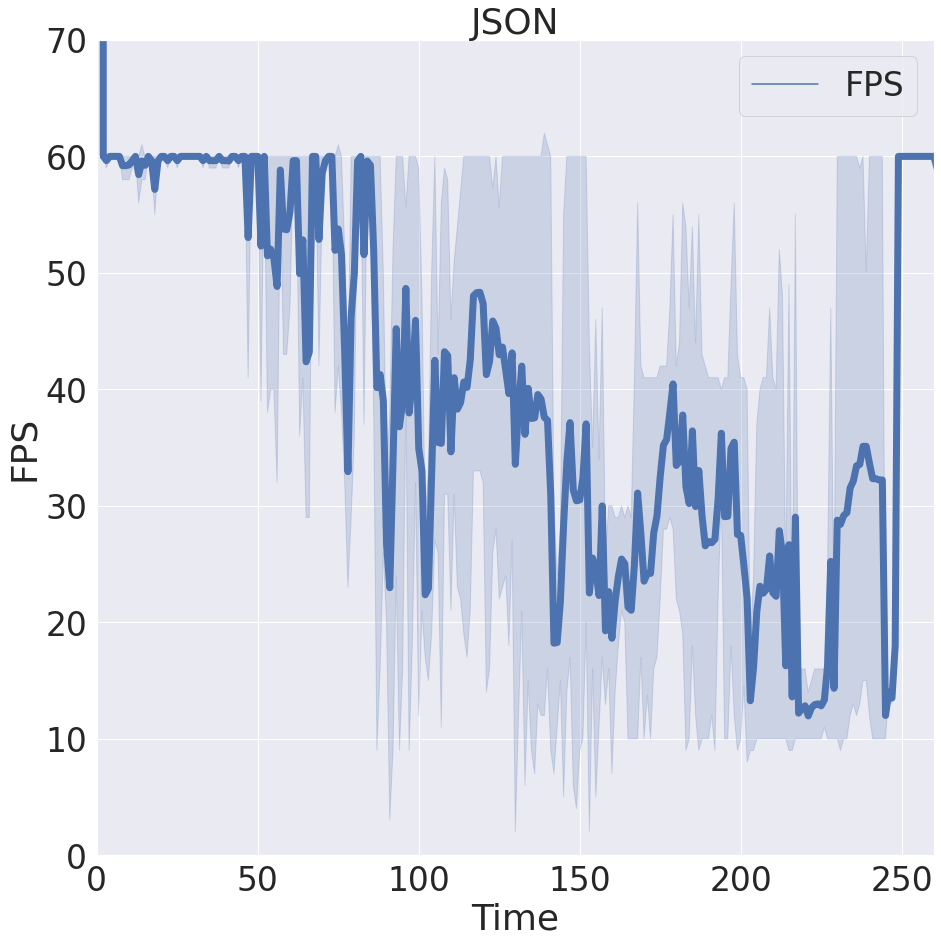

In [56]:
ax = sns.lineplot(data=result['json']['FPS'], linewidth='7')
ax.set(ylim=(0, 70))
ax.set(xlim=(0, 260))
ax.set(title='JSON', xlabel='Time', ylabel='FPS')
plt.show()

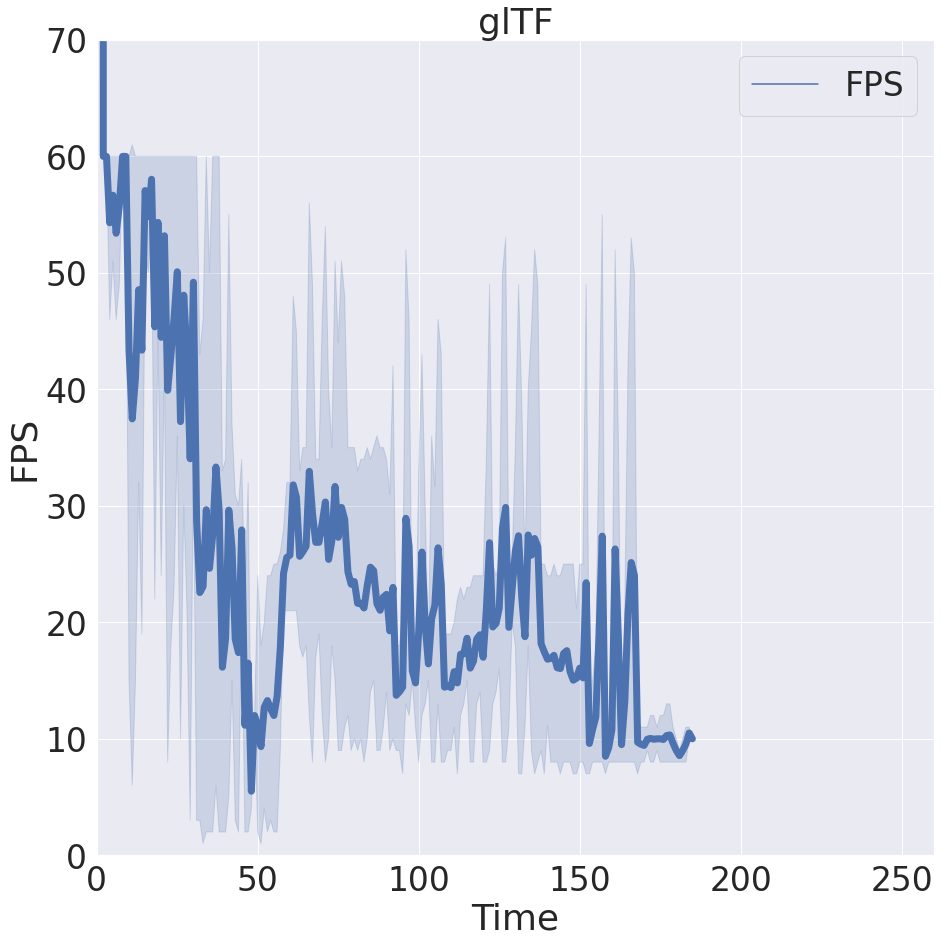

In [57]:
ax = sns.lineplot(data=result['gltf']['FPS'], linewidth='7')
ax.set(ylim=(0, 70))
ax.set(xlim=(0, 260))
ax.set(title='glTF', xlabel='Time', ylabel='FPS')
plt.show()

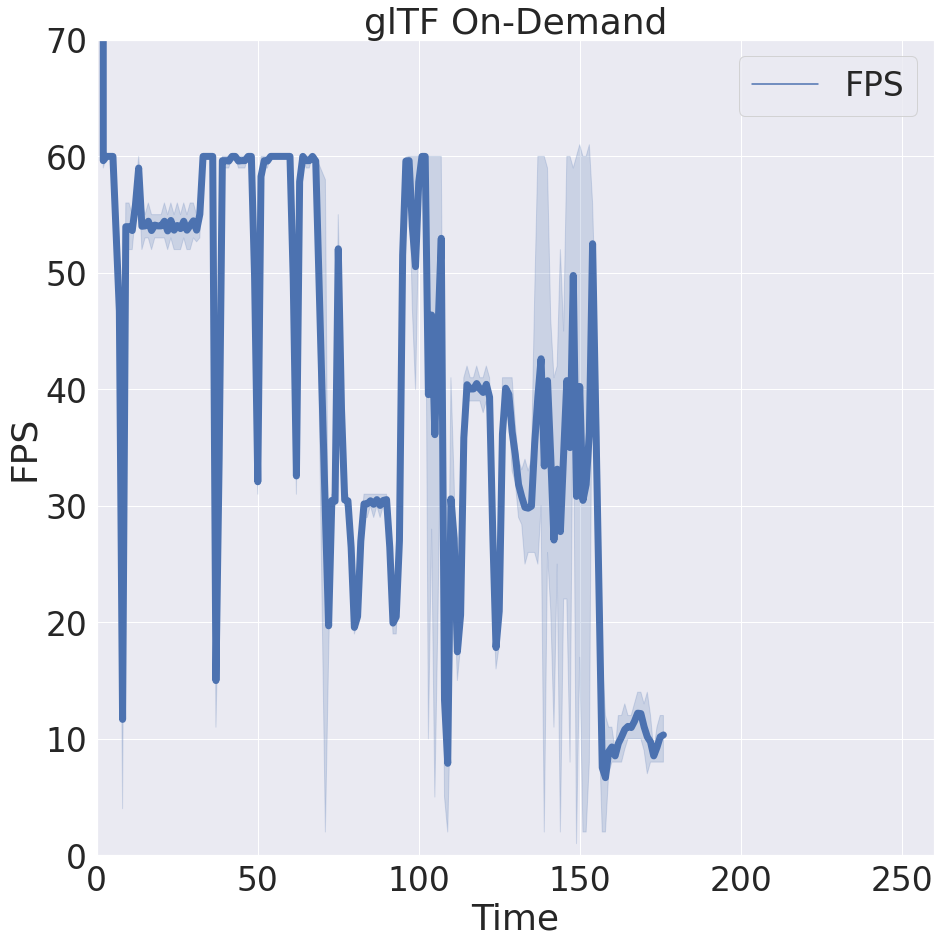

In [58]:
ax = sns.lineplot(data=result['gltf_on_demand']['FPS'], linewidth='7')
ax.set(ylim=(0, 70))
ax.set(xlim=(0, 260))
ax.set(title='glTF On-Demand', xlabel='Time', ylabel='FPS')
plt.show()

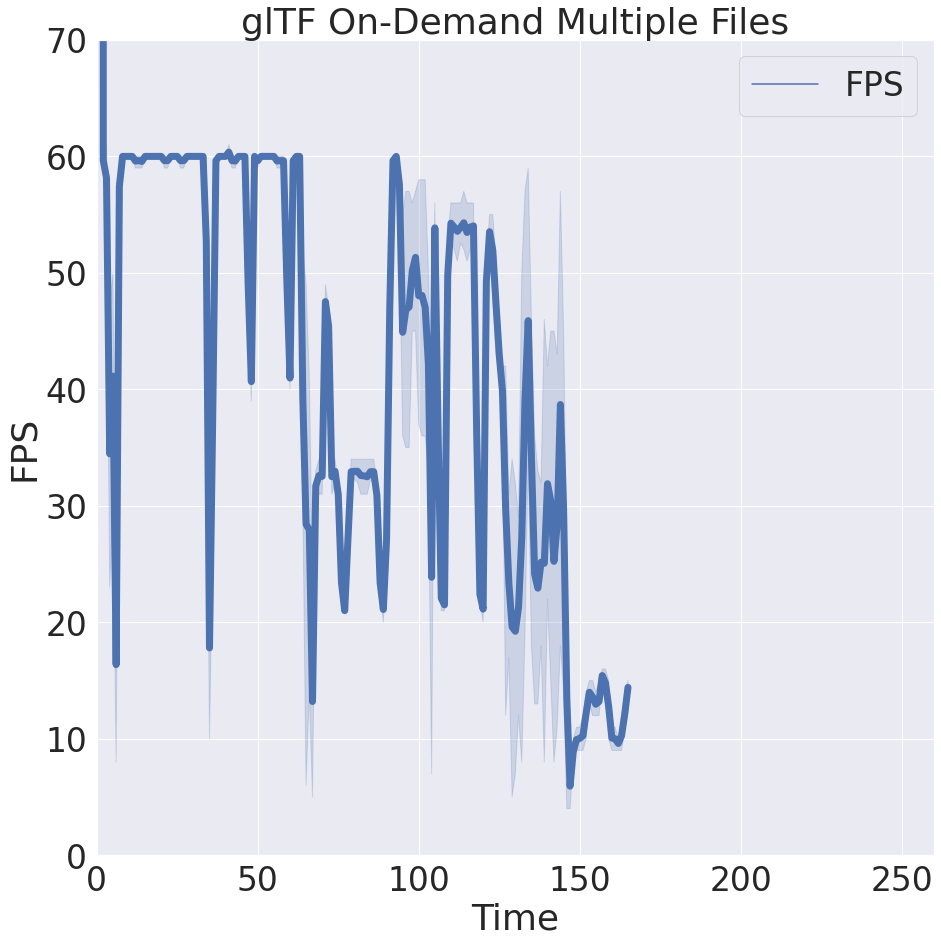

In [59]:
ax = sns.lineplot(data=result['gltf_on_demand_multiple_files']['FPS'], linewidth='7')
ax.set(ylim=(0, 70))
ax.set(xlim=(0, 260))
ax.set(title='glTF On-Demand Multiple Files', xlabel='Time', ylabel='FPS')
plt.show()

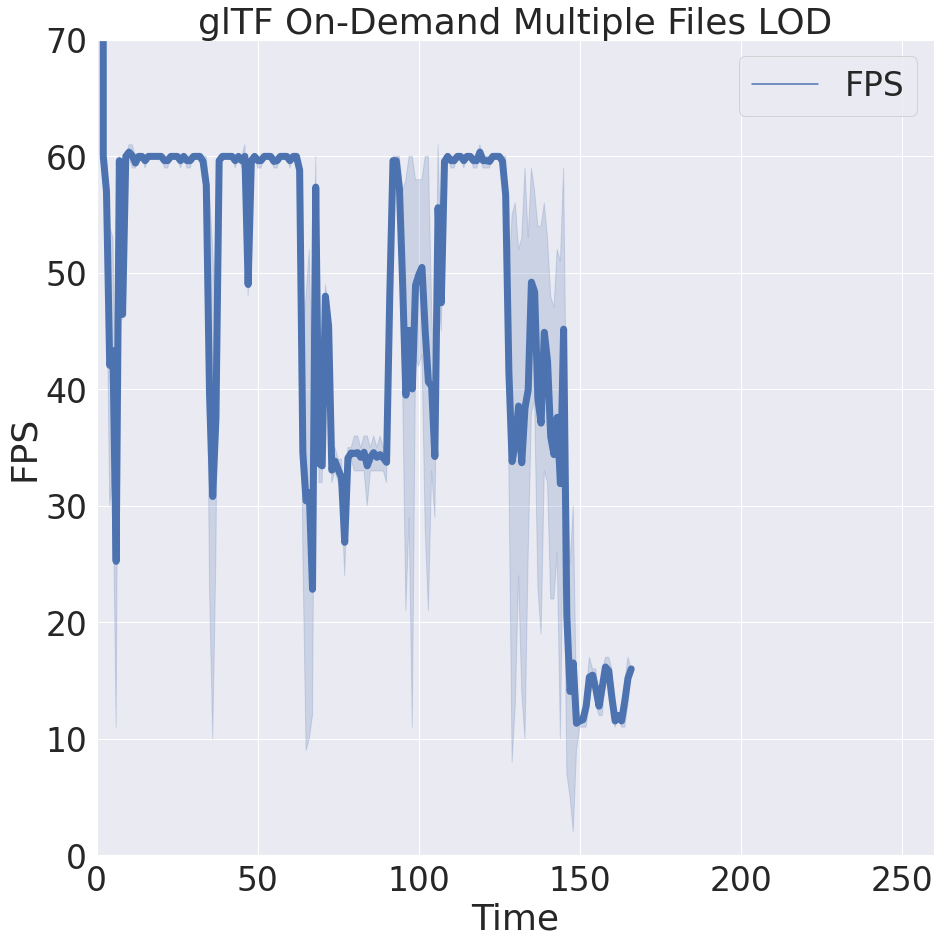

In [60]:
ax = sns.lineplot(data=result['gltf_on_demand_multiple_files_lod']['FPS'], linewidth='7')
ax.set(ylim=(0, 70))
ax.set(xlim=(0, 260))
ax.set(title='glTF On-Demand Multiple Files LOD', xlabel='Time', ylabel='FPS')
plt.show()

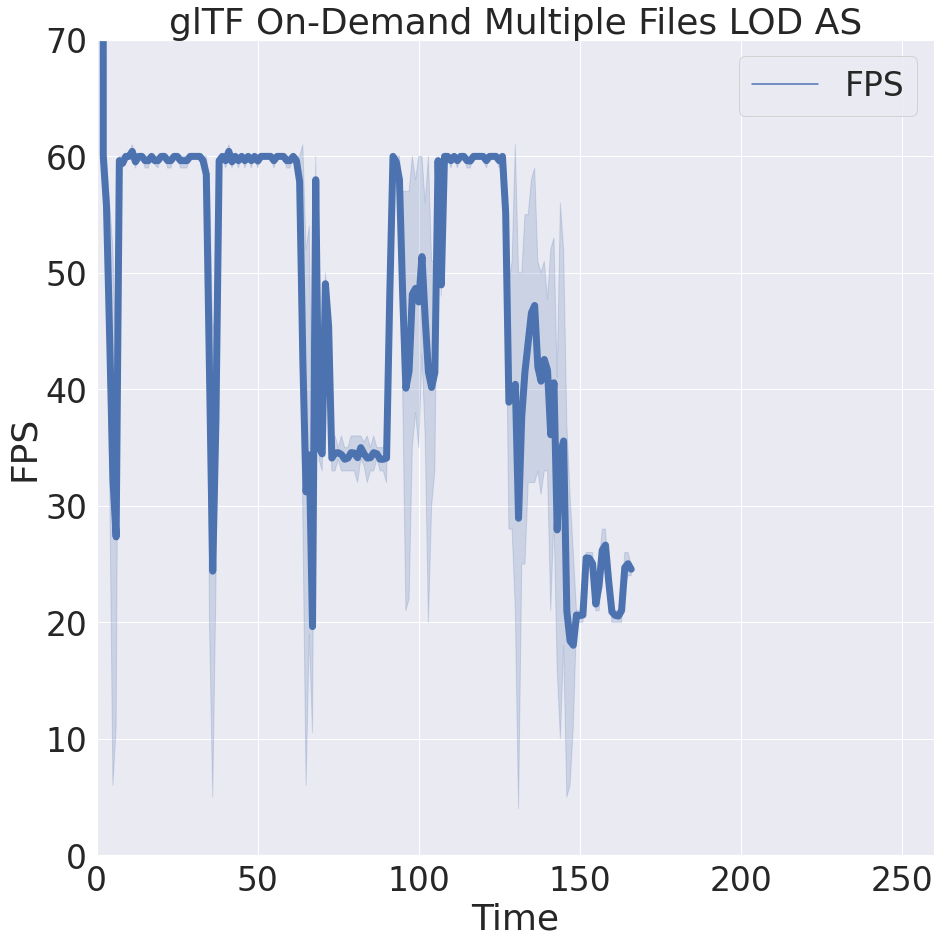

In [61]:
ax = sns.lineplot(data=result['gltf_on_demand_multiple_files_lod_active_scene']['FPS'], linewidth='7')
ax.set(ylim=(0, 70))
ax.set(xlim=(0, 260))
ax.set(title='glTF On-Demand Multiple Files LOD AS', xlabel='Time', ylabel='FPS')
plt.show()

In [47]:
#fps_avg = fps_df.mean()

df_list = [result[folder]['FPS'] for folder in folders]

fps_df = reduce(lambda left,right: pd.merge(left,right,on=['TIME'], how='outer'), df_list)

fps_df

<ipython-input-47-d07021883606>:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {('FPS_x', 'min'), ('FPS_x', 'max'), ('FPS_x', 'mean')} in the result is deprecated and will raise a MergeError in a future version.
  fps_df = reduce(lambda left,right: pd.merge(left,right,on=['TIME'], how='outer'), df_list)


ValueError: cannot handle a non-unique multi-index!

In [17]:
sns.set_context("poster")
sns.despine()
sns.set(font_scale = 3)
plt.rcParams['figure.figsize']=(40,40)

<Figure size 1080x1080 with 0 Axes>

In [19]:
result['json']['CPU']

,min,max,mean
TIME,,,
-9,0.0,0.0,0.00
-8,0.0,6.2,1.54
-7,0.0,13.9,2.64
-6,0.0,12.3,2.63
-5,0.0,4.6,0.61
...,...,...,...
245,100.0,106.2,103.10
246,26.2,81.2,53.70
247,1.5,1.5,1.50


# CPU Statistics

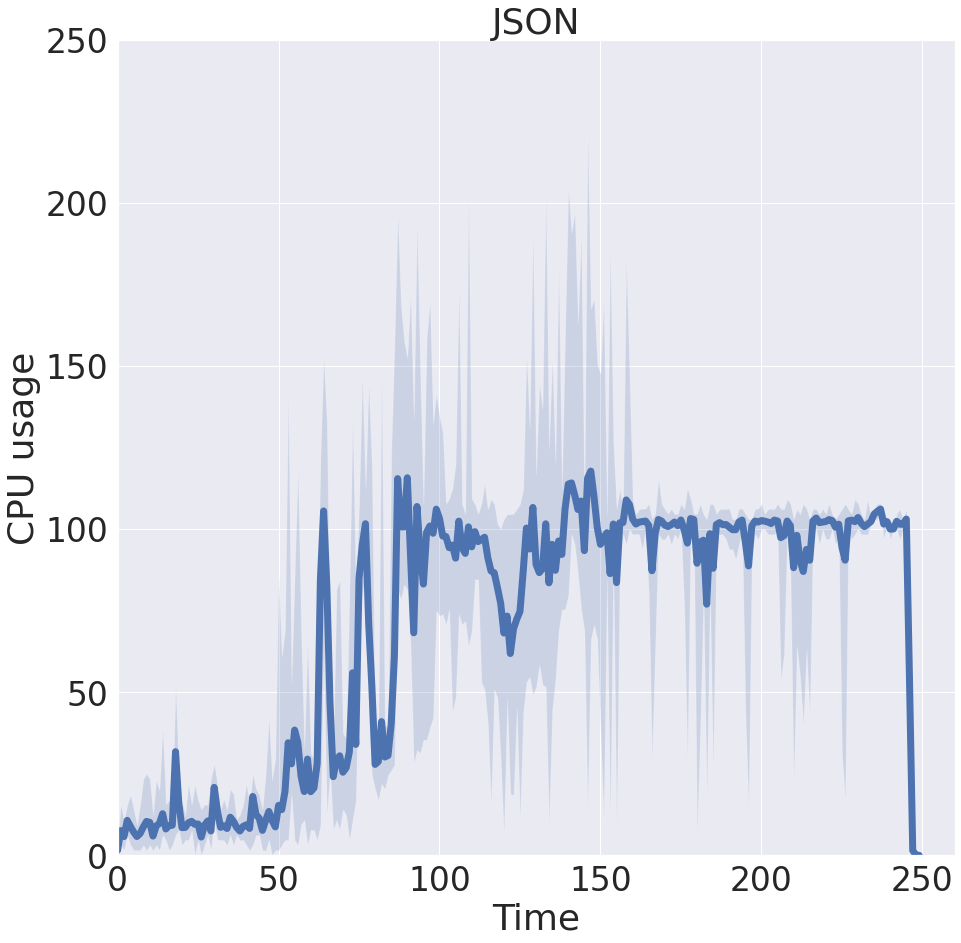

In [62]:
ax = sns.lineplot(data=result['json']['CPU'], x='TIME', y='mean', linewidth='7')
ax.fill_between(result['json']['CPU'].index, result['json']['CPU']['min'], result['json']['CPU']['max'], alpha=0.2)
ax.set(ylim=(0, 250))
ax.set(xlim=(0, 260))
ax.set(title='JSON', xlabel='Time', ylabel='CPU usage')
plt.show()

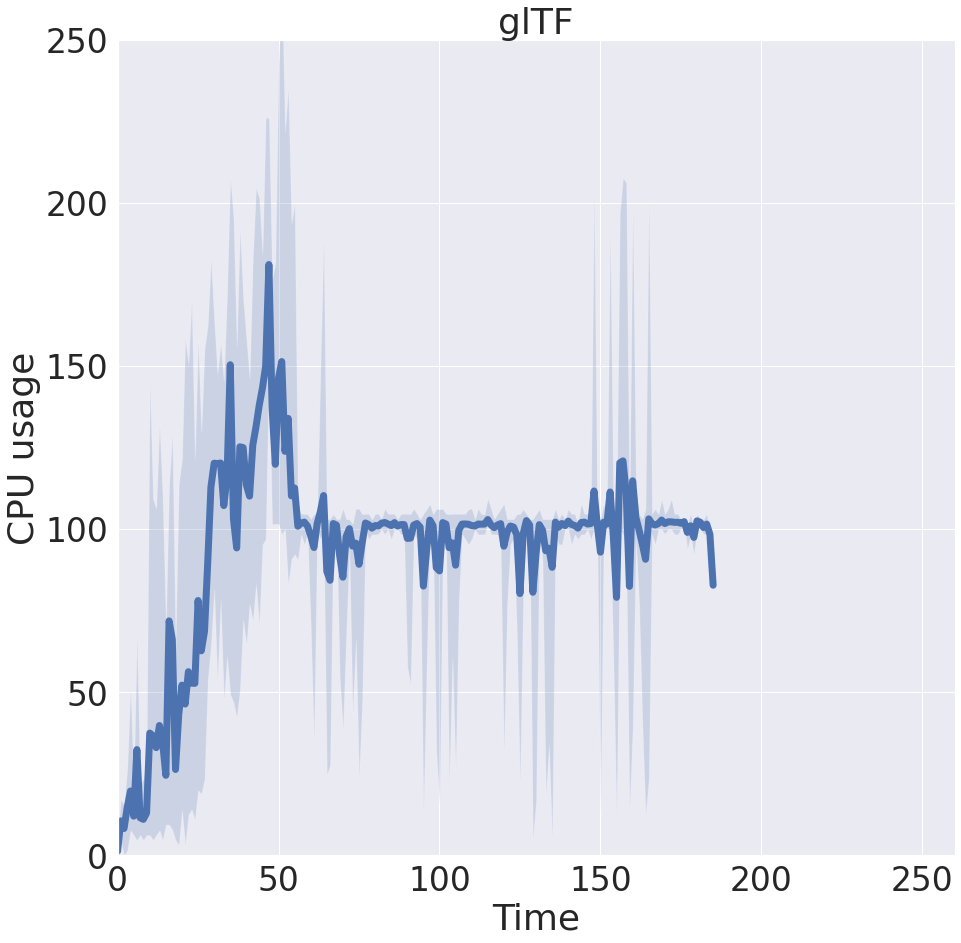

In [63]:
ax = sns.lineplot(data=result['gltf']['CPU'], x='TIME', y='mean', linewidth='7')
ax.fill_between(result['gltf']['CPU'].index, result['gltf']['CPU']['min'], result['gltf']['CPU']['max'], alpha=0.2)
ax.set(ylim=(0, 250))
ax.set(xlim=(0, 260))
ax.set(title='glTF', xlabel='Time', ylabel='CPU usage')
plt.show()

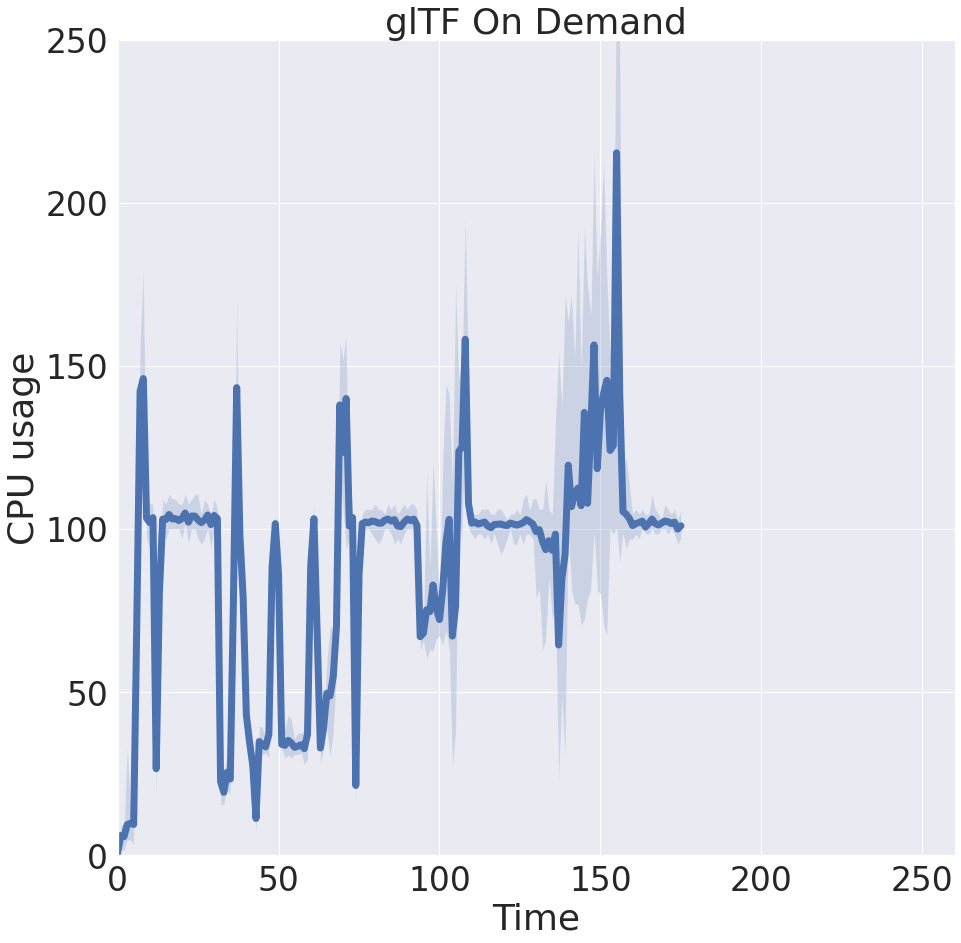

In [64]:
ax = sns.lineplot(data=result['gltf_on_demand']['CPU'], x='TIME', y='mean', linewidth='7')
ax.fill_between(result['gltf_on_demand']['CPU'].index, result['gltf_on_demand']['CPU']['min'], result['gltf_on_demand']['CPU']['max'], alpha=0.2)
ax.set(ylim=(0, 250))
ax.set(xlim=(0, 260))
ax.set(title='glTF On Demand', xlabel='Time', ylabel='CPU usage')
plt.show()

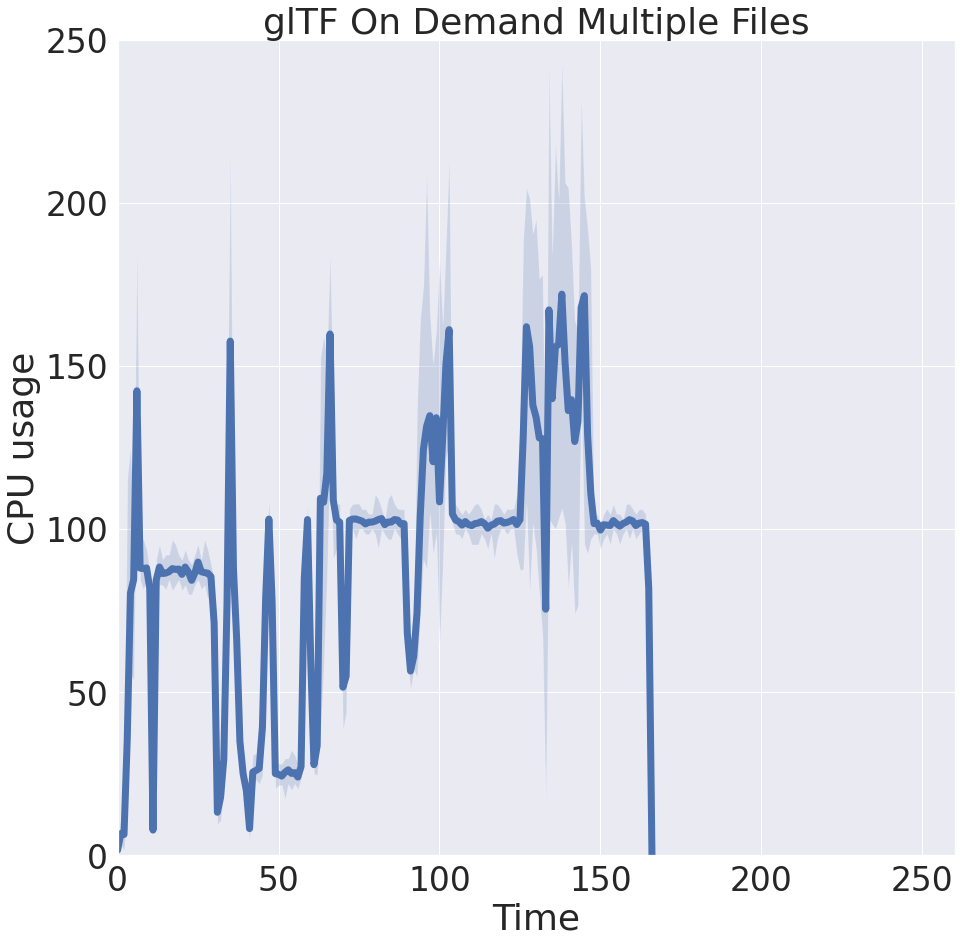

In [65]:
ax = sns.lineplot(data=result['gltf_on_demand_multiple_files']['CPU'], x='TIME', y='mean', linewidth='7')
ax.fill_between(result['gltf_on_demand_multiple_files']['CPU'].index, result['gltf_on_demand_multiple_files']['CPU']['min'], result['gltf_on_demand_multiple_files']['CPU']['max'], alpha=0.2)
ax.set(ylim=(0, 250))
ax.set(xlim=(0, 260))
ax.set(title='glTF On Demand Multiple Files', xlabel='Time', ylabel='CPU usage')
plt.show()

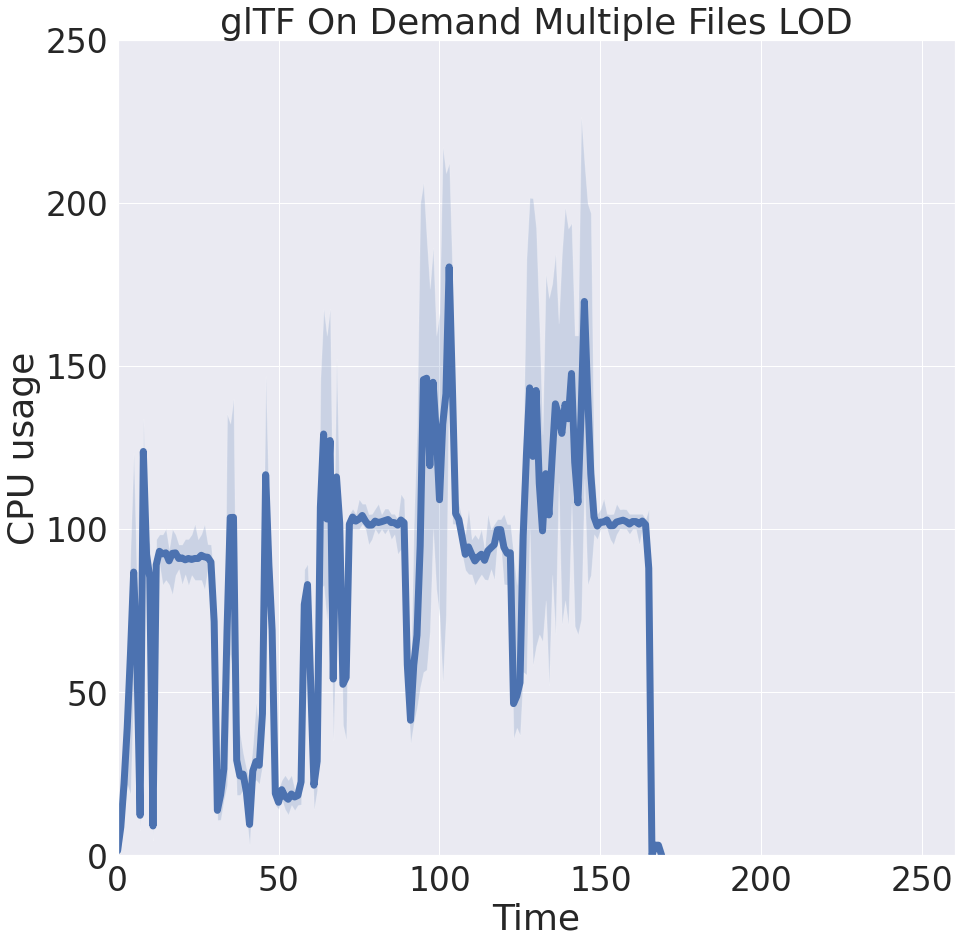

In [66]:
ax = sns.lineplot(data=result['gltf_on_demand_multiple_files_lod']['CPU'], x='TIME', y='mean', linewidth='7')
ax.fill_between(result['gltf_on_demand_multiple_files_lod']['CPU'].index, result['gltf_on_demand_multiple_files_lod']['CPU']['min'], result['gltf_on_demand_multiple_files_lod']['CPU']['max'], alpha=0.2)
ax.set(ylim=(0, 250))
ax.set(xlim=(0, 260))
ax.set(title='glTF On Demand Multiple Files LOD', xlabel='Time', ylabel='CPU usage')
plt.show()



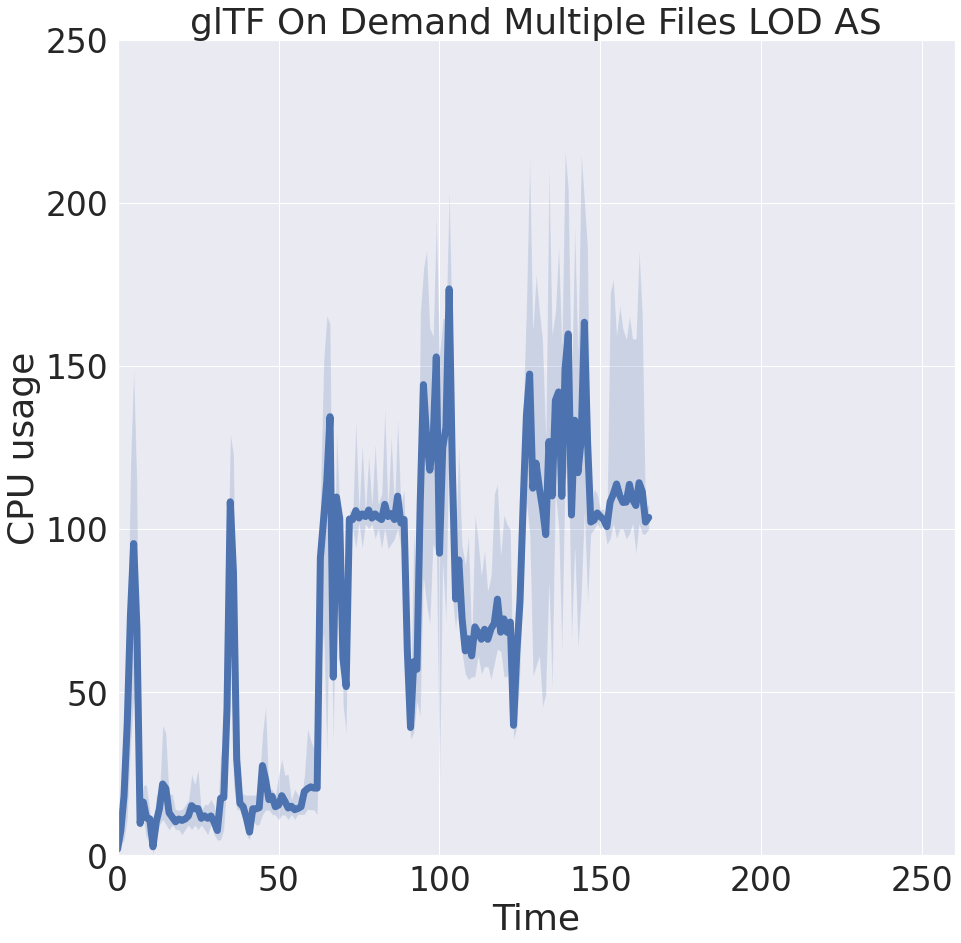

In [67]:
ax = sns.lineplot(data=result['gltf_on_demand_multiple_files_lod_active_scene']['CPU'], x='TIME', y='mean', linewidth='7')
ax.fill_between(result['gltf_on_demand_multiple_files_lod_active_scene']['CPU'].index, result['gltf_on_demand_multiple_files_lod_active_scene']['CPU']['min'], result['gltf_on_demand_multiple_files_lod_active_scene']['CPU']['max'], alpha=0.2)
ax.set(ylim=(0, 250))
ax.set(xlim=(0, 260))
ax.set(title='glTF On Demand Multiple Files LOD AS', xlabel='Time', ylabel='CPU usage')
plt.show()

# Memory statistics

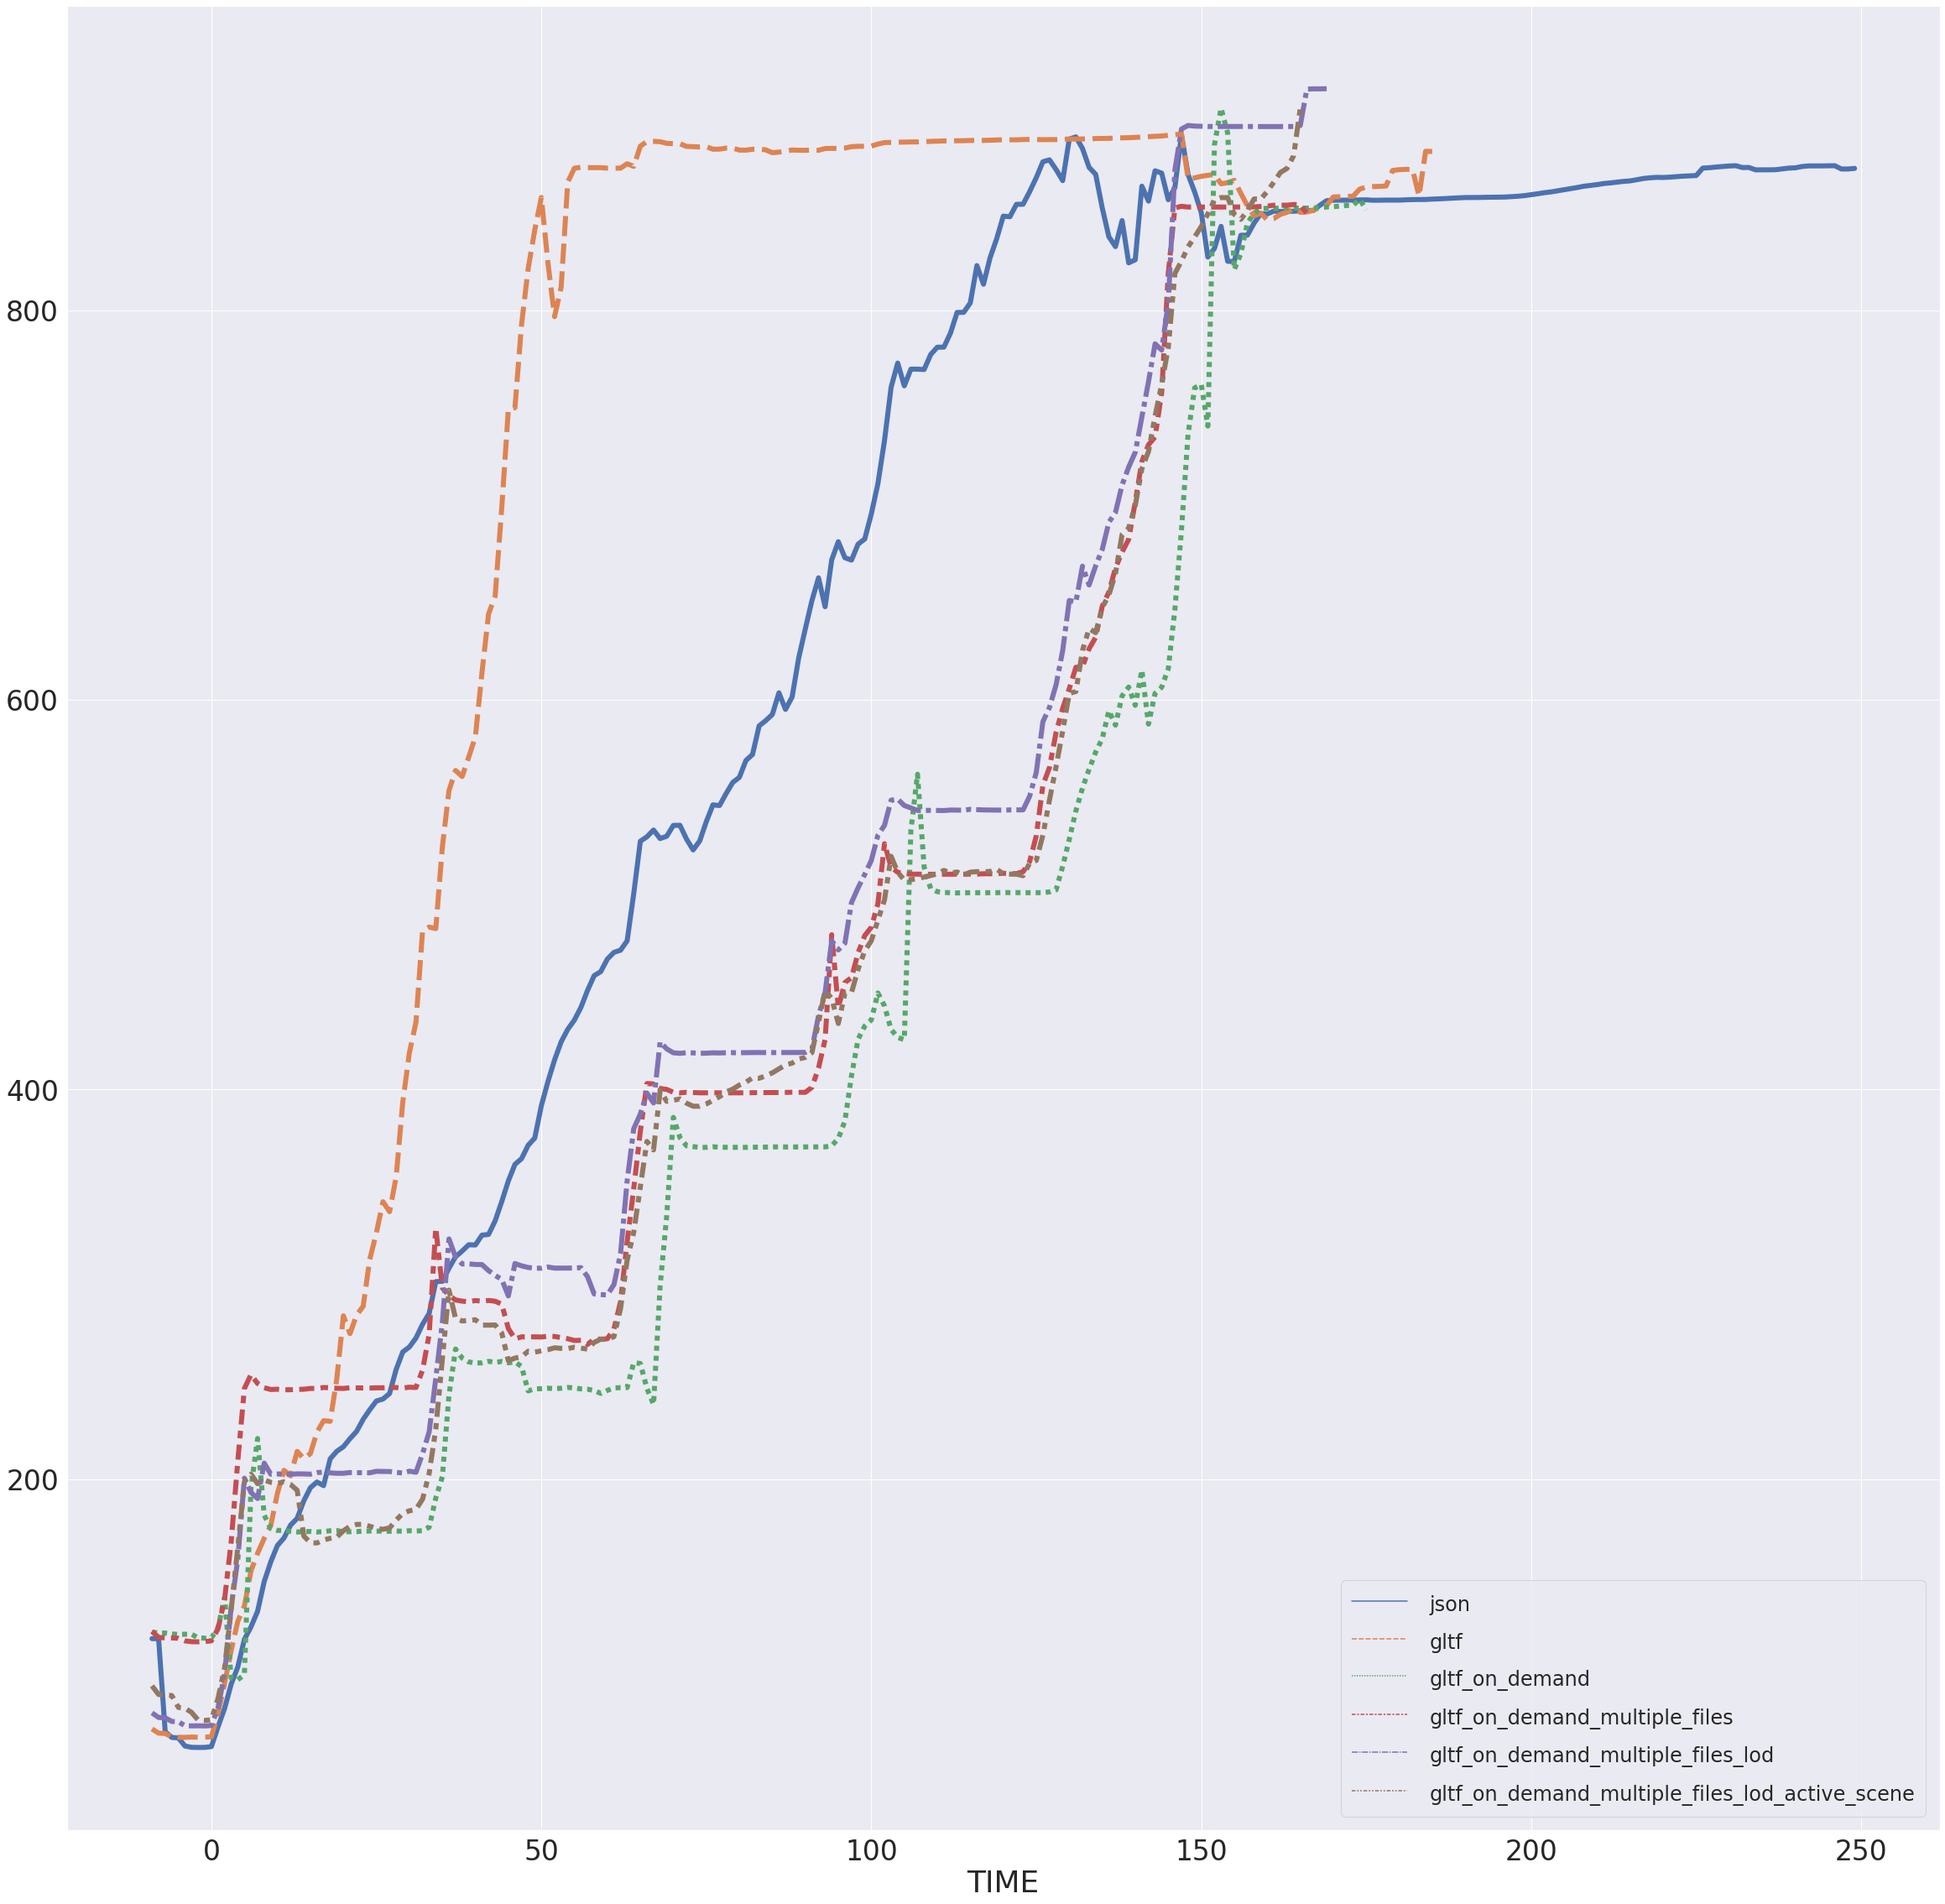

In [54]:
ax = sns.lineplot(data=memory_df, sort=True, linewidth='6')
plt.setp(ax.get_legend().get_texts(), fontsize='24')
plt.show()

In [ ]:
memory_avg = memory_df.mean()
memory_avg

json_MEMORY                                              542.126152
gltf_MEMORY                                              687.957438
gltf_on_demand_MEMORY                                    393.034456
gltf_on_demand_multiple_files_MEMORY                     413.878297
gltf_on_demand_multiple_files_lod_MEMORY                 433.442851
gltf_on_demand_multiple_files_lod_active_scene_MEMORY    409.151463
dtype: float64

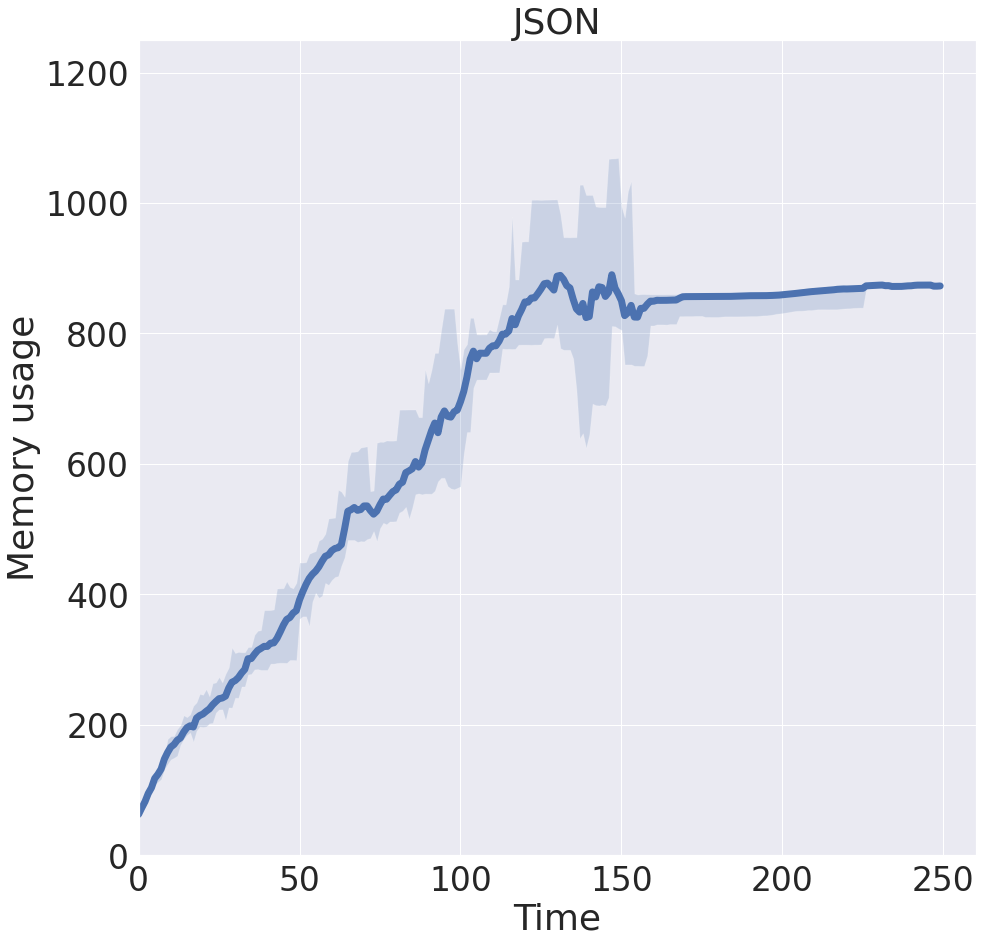

In [7]:
ax = sns.lineplot(data=result['json']['RAM'], x='TIME', y='mean', linewidth='7')
ax.fill_between(result['json']['RAM'].index, result['json']['RAM']['min'], result['json']['RAM']['max'], alpha=0.2)
ax.set(ylim=(0, 1250))
ax.set(xlim=(0, 260))
ax.set(title='JSON', xlabel='Time', ylabel='Memory usage')
plt.show()

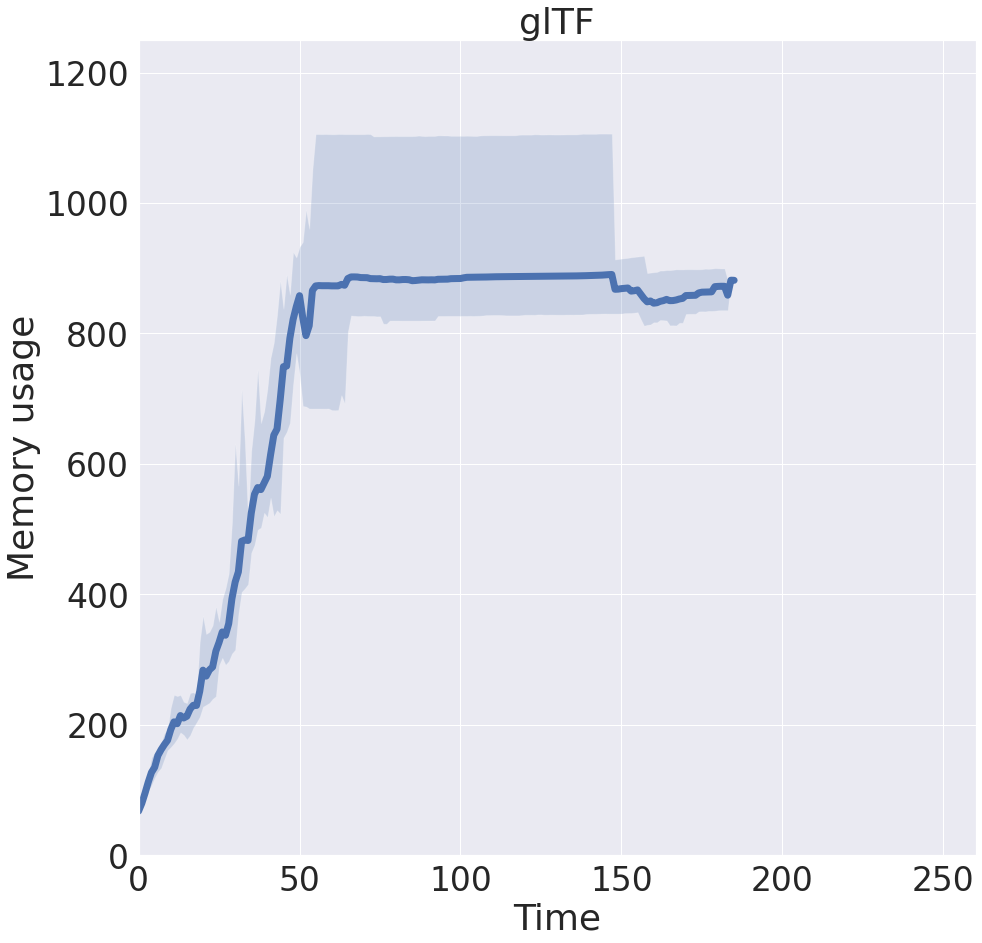

In [10]:
ax = sns.lineplot(data=result['gltf']['RAM'], x='TIME', y='mean', linewidth='7')
ax.fill_between(result['gltf']['RAM'].index, result['gltf']['RAM']['min'], result['gltf']['RAM']['max'], alpha=0.2)
ax.set(ylim=(0, 1250))
ax.set(xlim=(0, 260))
ax.set(title='glTF', xlabel='Time', ylabel='Memory usage')
plt.show()

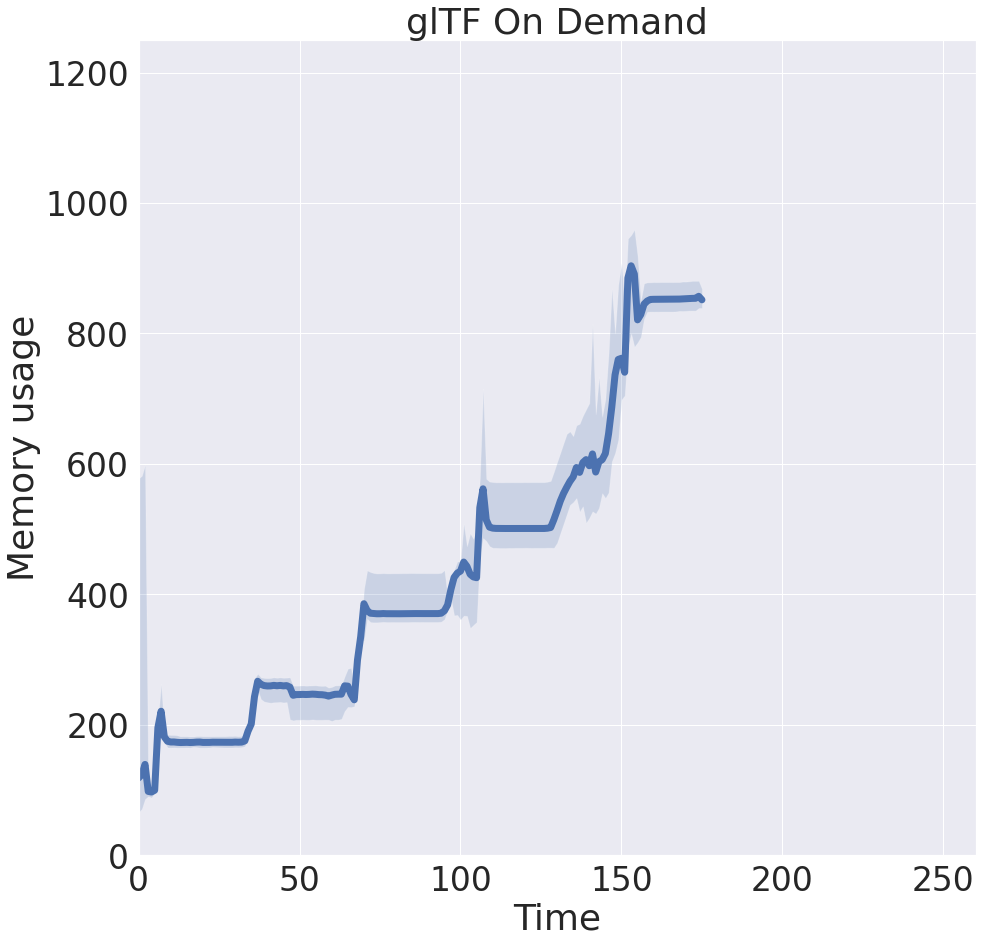

In [13]:
ax = sns.lineplot(data=result['gltf_on_demand']['RAM'], x='TIME', y='mean', linewidth='7')
ax.fill_between(result['gltf_on_demand']['RAM'].index, result['gltf_on_demand']['RAM']['min'], result['gltf_on_demand']['RAM']['max'], alpha=0.2)
ax.set(ylim=(0, 1250))
ax.set(xlim=(0, 260))
ax.set(title='glTF On Demand', xlabel='Time', ylabel='Memory usage')
plt.show()

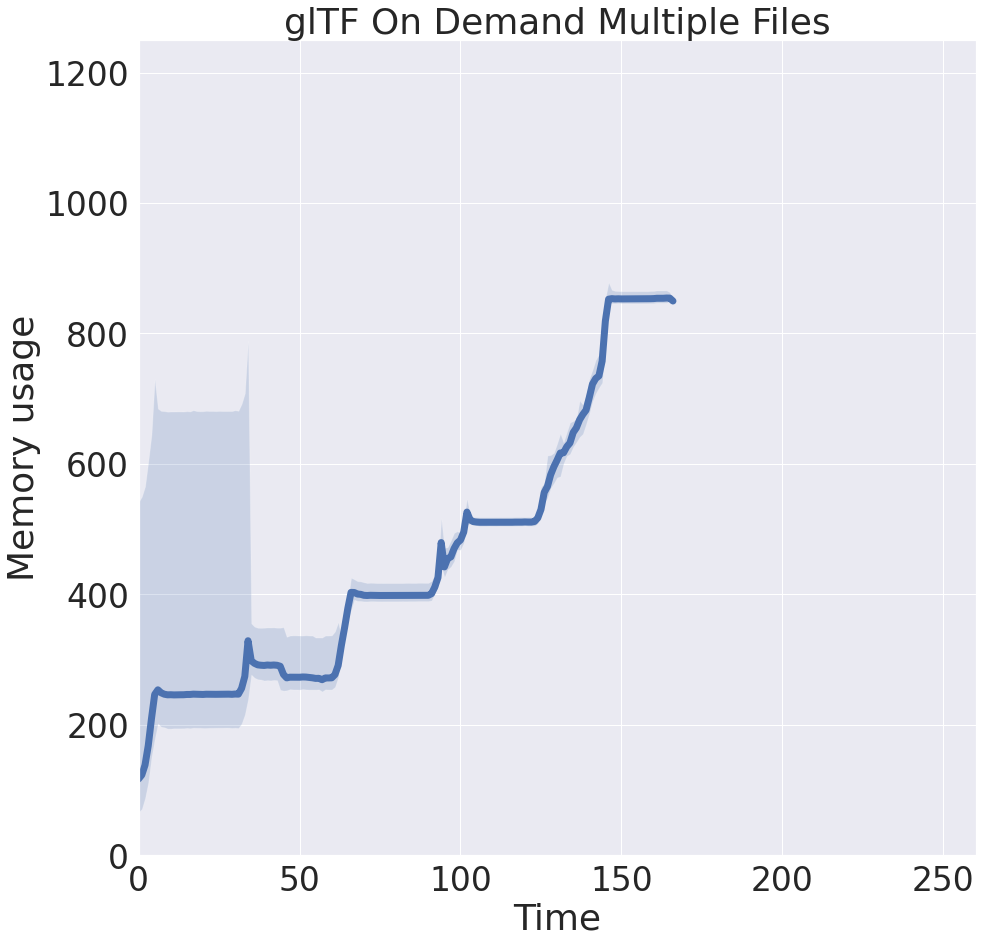

In [15]:
ax = sns.lineplot(data=result['gltf_on_demand_multiple_files']['RAM'], x='TIME', y='mean', linewidth='7')
ax.fill_between(result['gltf_on_demand_multiple_files']['RAM'].index, result['gltf_on_demand_multiple_files']['RAM']['min'], result['gltf_on_demand_multiple_files']['RAM']['max'], alpha=0.2)
ax.set(ylim=(0, 1250))
ax.set(xlim=(0, 260))
ax.set(title='glTF On Demand Multiple Files', xlabel='Time', ylabel='Memory usage')
plt.show()

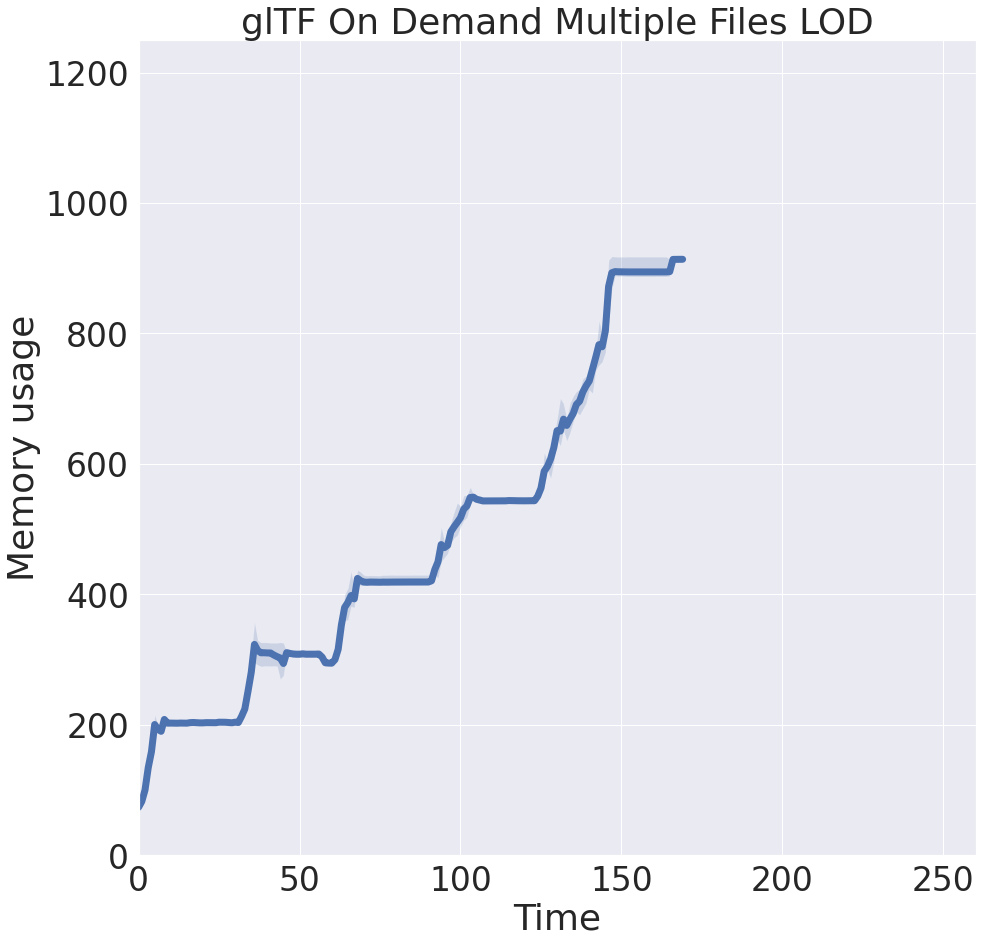

In [16]:
ax = sns.lineplot(data=result['gltf_on_demand_multiple_files_lod']['RAM'], x='TIME', y='mean', linewidth='7')
ax.fill_between(result['gltf_on_demand_multiple_files_lod']['RAM'].index, result['gltf_on_demand_multiple_files_lod']['RAM']['min'], result['gltf_on_demand_multiple_files_lod']['RAM']['max'], alpha=0.2)
ax.set(ylim=(0, 1250))
ax.set(xlim=(0, 260))
ax.set(title='glTF On Demand Multiple Files LOD', xlabel='Time', ylabel='Memory usage')
plt.show()


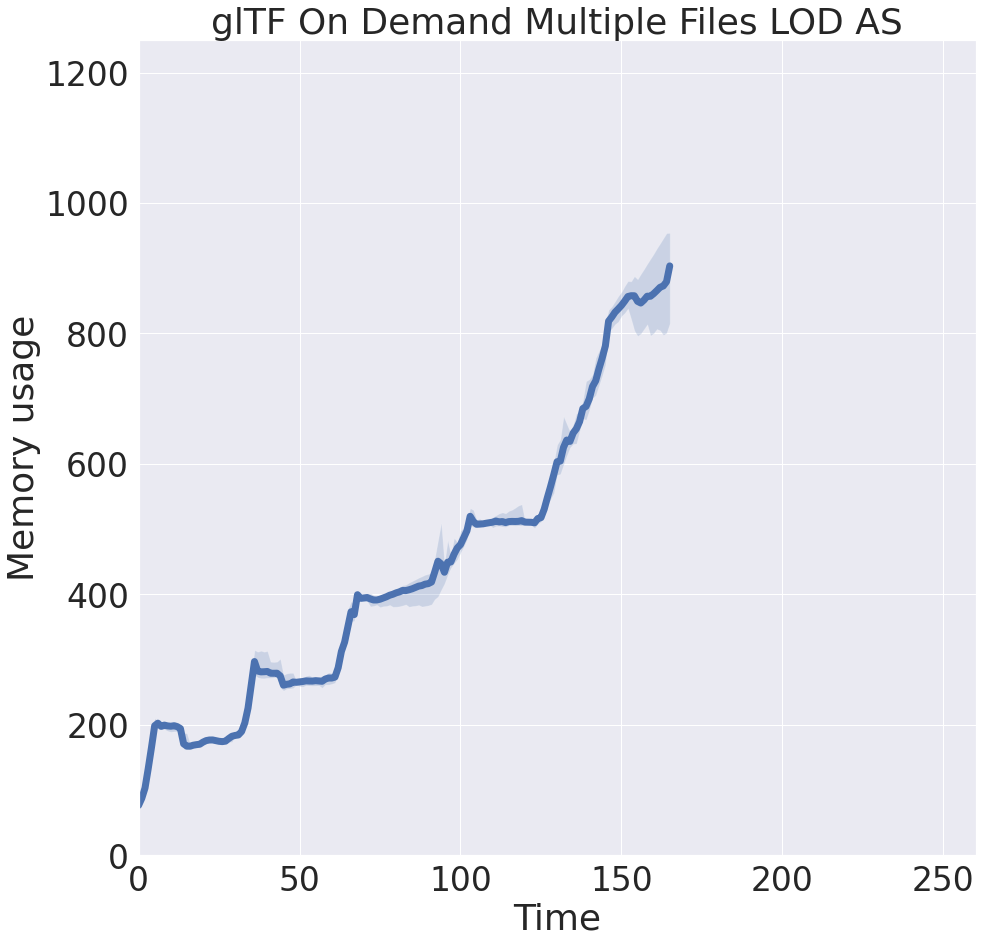

In [18]:
ax = sns.lineplot(data=result['gltf_on_demand_multiple_files_lod_active_scene']['RAM'], x='TIME', y='mean', linewidth='7')
ax.fill_between(result['gltf_on_demand_multiple_files_lod_active_scene']['RAM'].index, result['gltf_on_demand_multiple_files_lod_active_scene']['RAM']['min'], result['gltf_on_demand_multiple_files_lod_active_scene']['RAM']['max'], alpha=0.2)
ax.set(ylim=(0, 1250))
ax.set(xlim=(0, 260))
ax.set(title='glTF On Demand Multiple Files LOD AS', xlabel='Time', ylabel='Memory usage')
plt.show()